# Comprehensive Diabetes Prediction using Machine Learning and Deep Learning

This project focuses on building predictive models for diabetes using machine learning (ML) and deep learning (DL) techniques. By analyzing various patient attributes, such as blood glucose levels, insulin levels, and BMI, the models aim to accurately predict the likelihood of diabetes.

**Libraries Used:**

* **pandas (pd):** For data manipulation and analysis.
  
* **numpy (np):** For numerical computations.

* **seaborn (sns):** For statistical data visualization.

* **scikit-learn (sklearn):** For machine learning models and evaluation.
* **matplotlib.pyplot (plt):** For creating plots.
**Steps:**

  * Data cleaning and preprocessing (e.g., handling outliers, feature scaling).
  * Feature engineering (e.g., creating new features from existing ones).
  * Exploratory data analysis (EDA) to understand the relationships between features and the target variable.
  * Model building and evaluation.

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

**Load the Dataset:**

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Describe the Data:**

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**Get Data Information:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 **Check for Null Values:**

In [5]:
df.isnull().values.any()

False

**Visualize Data Distribution:**

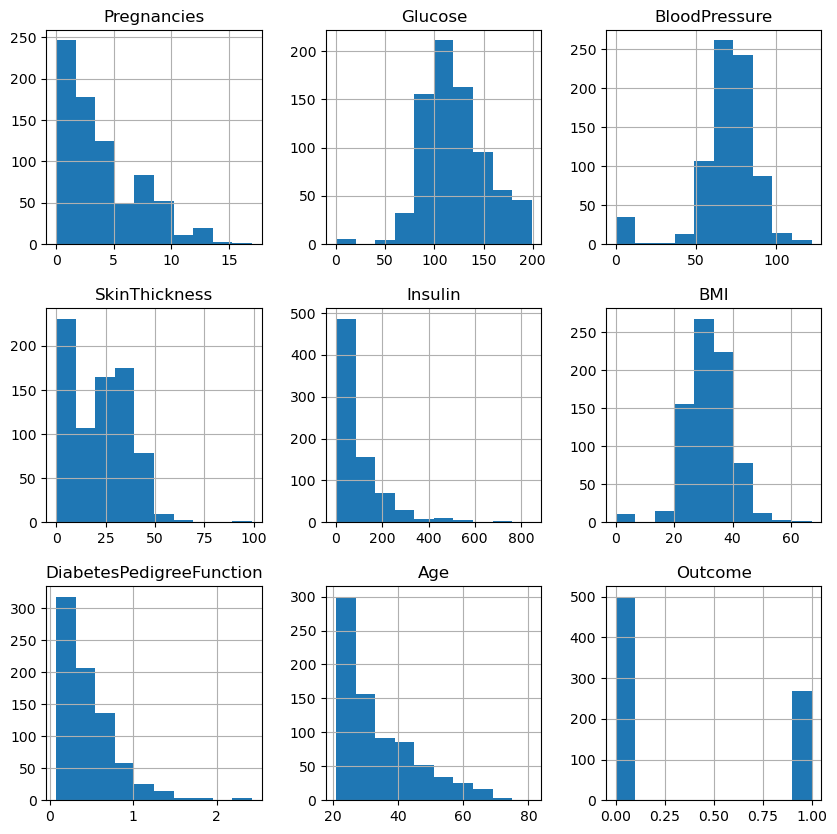

In [6]:
df.hist(bins=10,figsize=(10,10))
plt.show()

**Correlation Heatmap:**

Generates a heatmap of the correlation matrix, showing the pairwise correlations between all numerical columns in the dataset. This helps identify features that are highly correlated with each other or with the target variable (`Outcome`).

<Axes: >

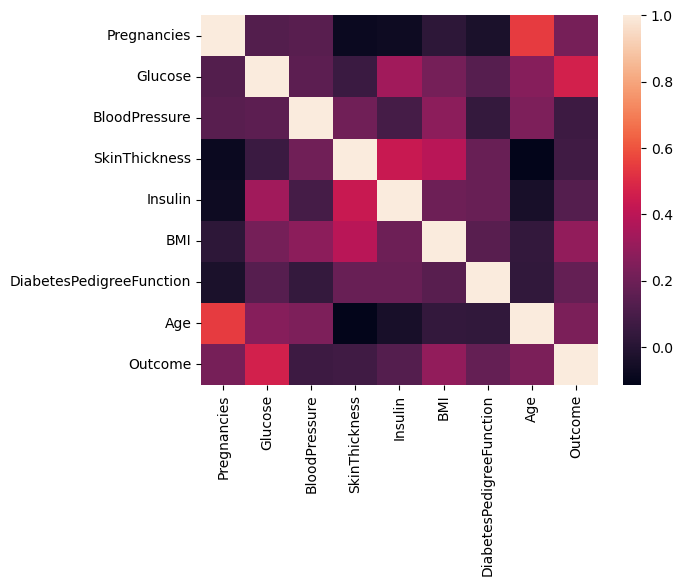

In [7]:
sns.heatmap(df.corr())

**Count Plot of Outcome:**

Creates a count plot showing the distribution of the target variable `Outcome`. This visualizes the number of diabetic (1) and non-diabetic (0) individuals in the dataset.

C:\Users\amrmu\AppData\Local\Temp\ipykernel_18392\712467204.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Outcome'],palette='Set1')


<Axes: xlabel='count', ylabel='Outcome'>

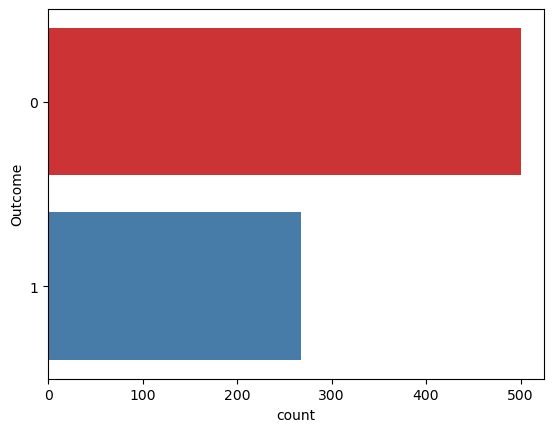

In [8]:
sns.countplot(y=df['Outcome'],palette='Set1')

**Pair Plot:**

Creates a pair plot, which shows scatter plots for all pairs of numerical variables and histograms for individual variables. The `hue='Outcome'` parameter colors the points based on the target variable, allowing for visual identification of potential relationships between features and the outcome.

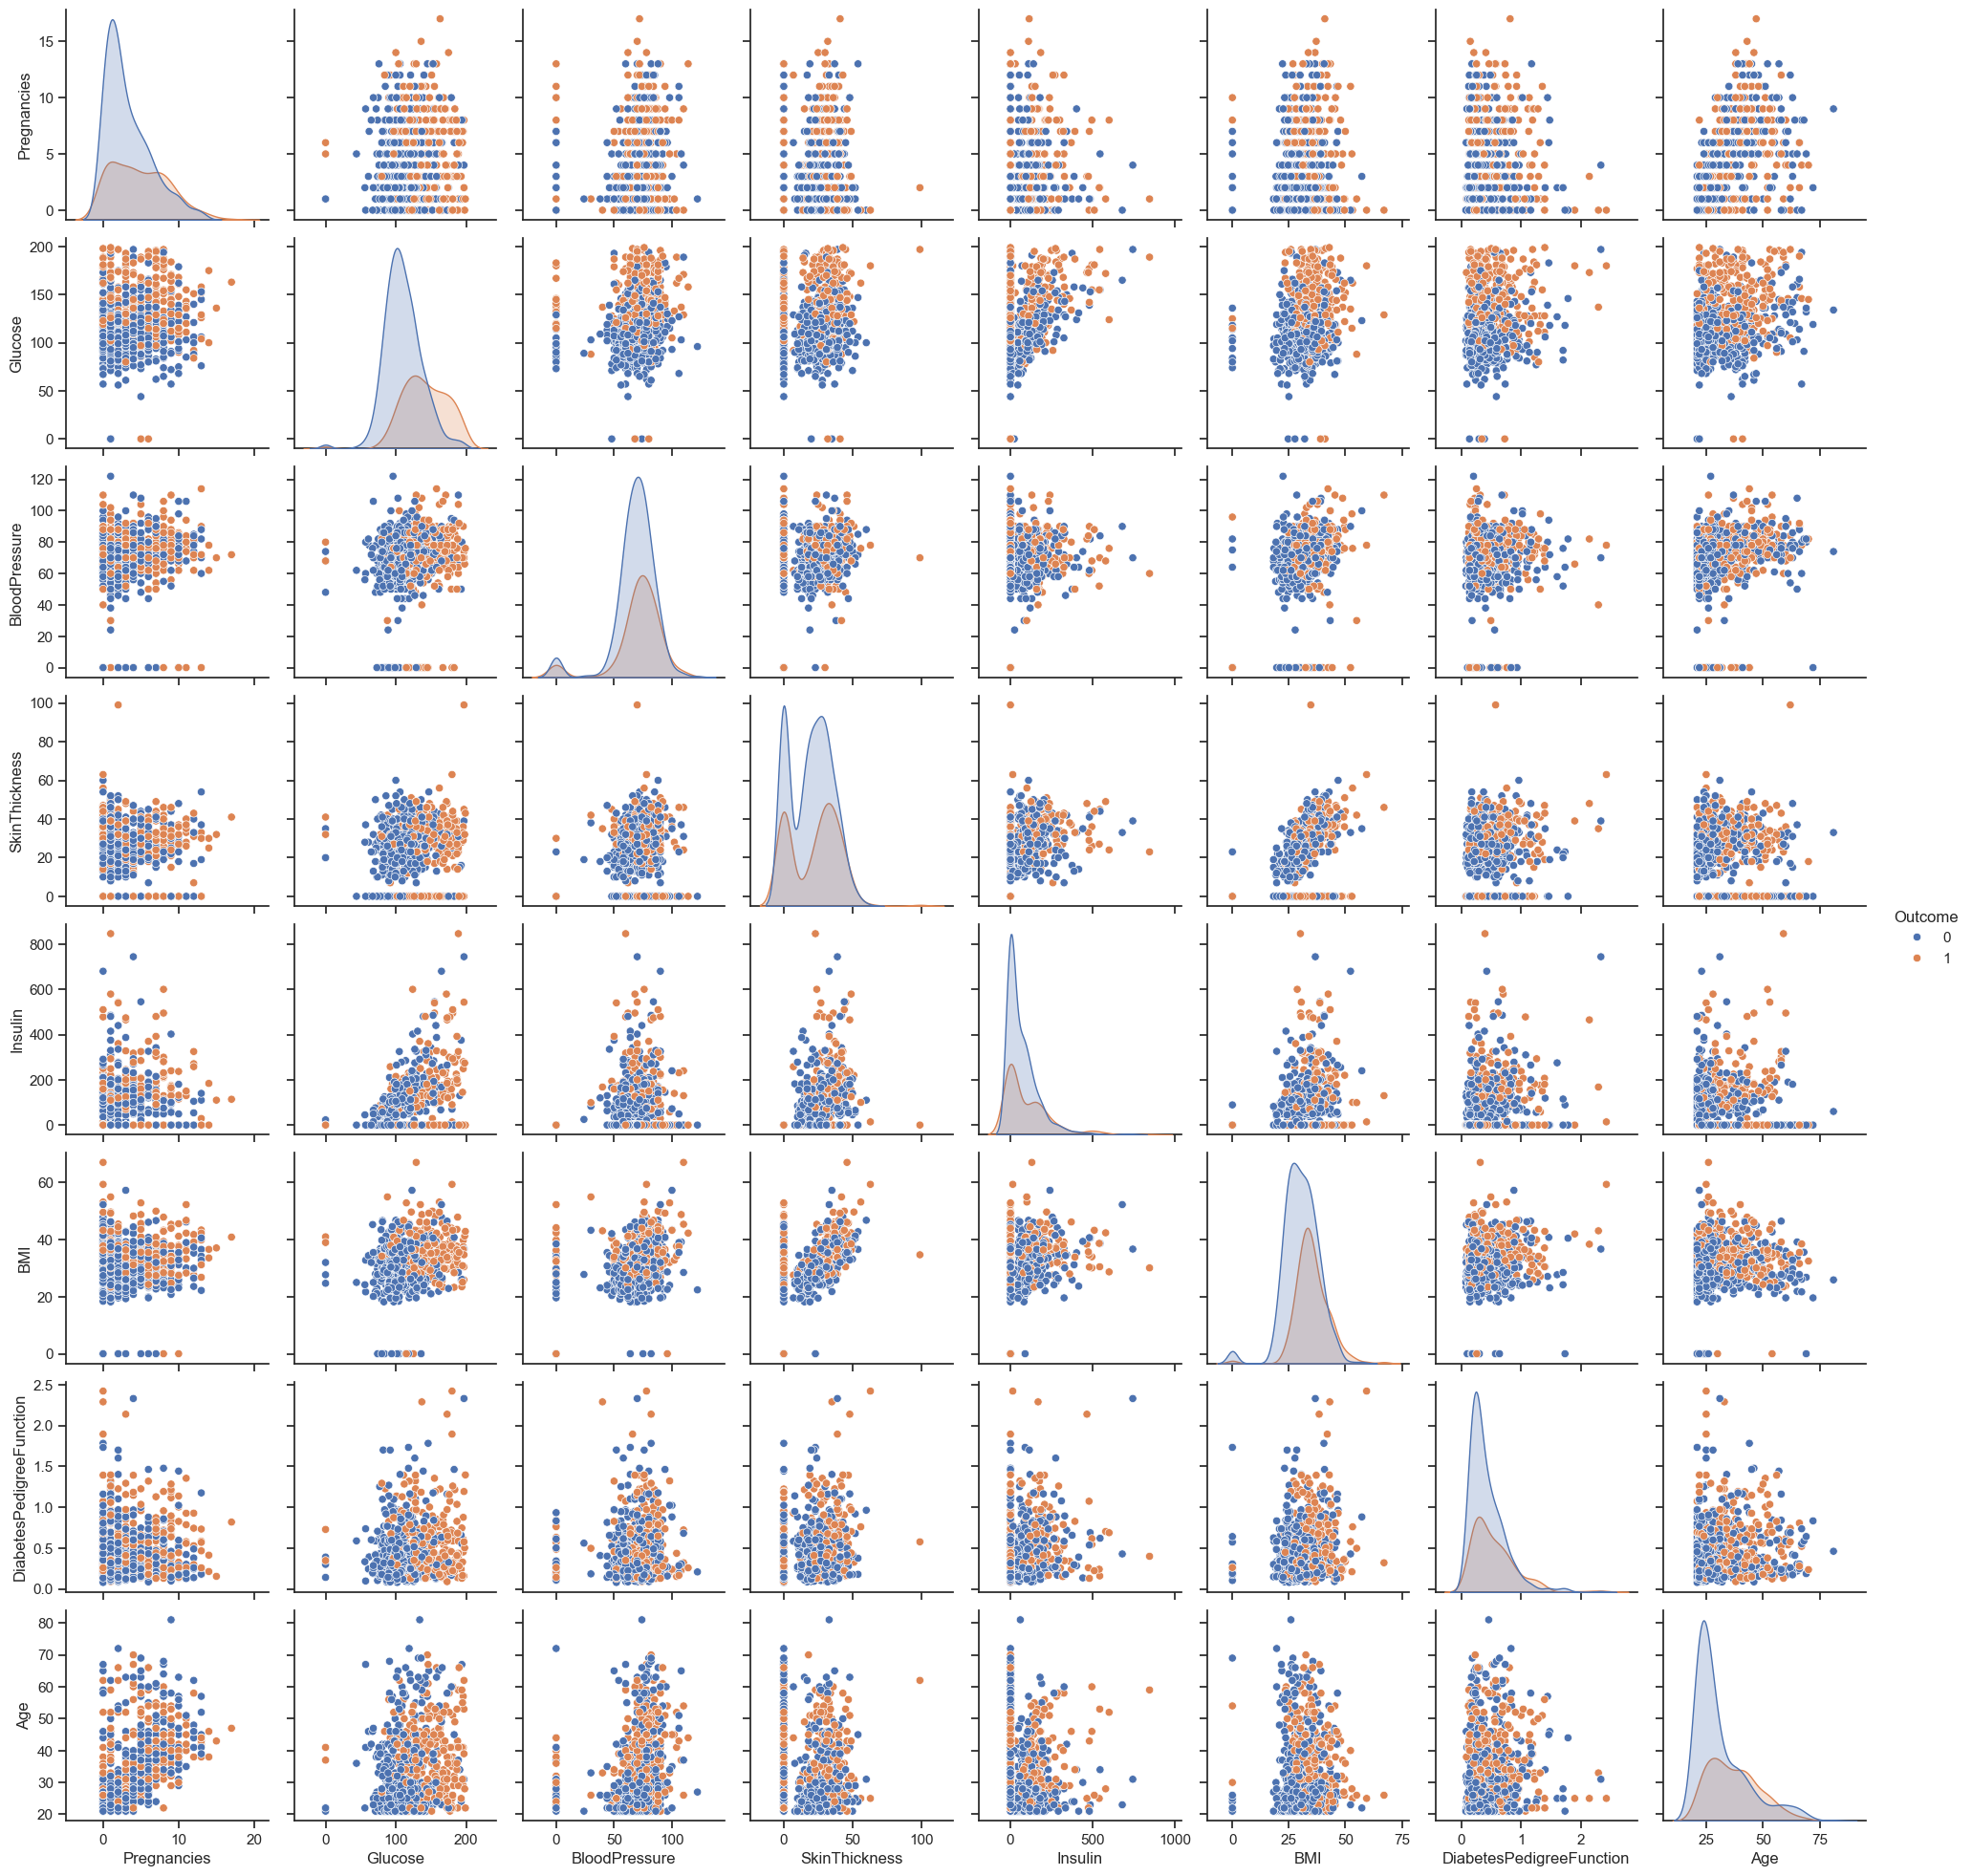

In [9]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

**Set Seaborn Style:**

Sets the visual style of the plots to "whitegrid".

<Axes: >

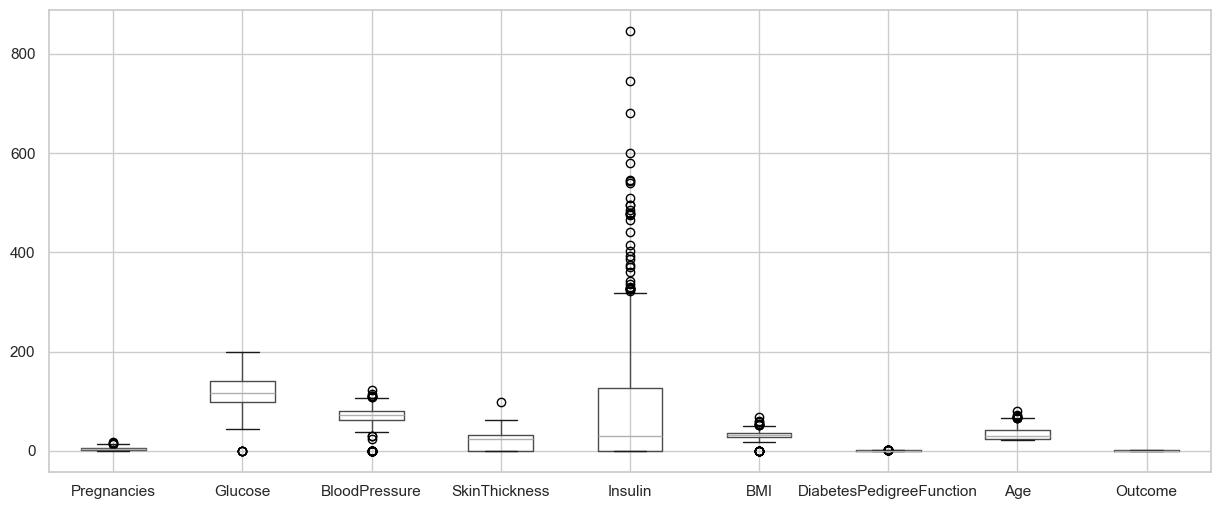

In [10]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

**Generate Box Plots for Specific Features:**

Creates box plots for the `Insulin`, `BloodPressure`, and `DiabetesPedigreeFunction` features individually. This allows for a closer look at the distribution and potential outliers in these specific features.

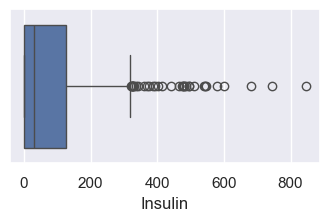

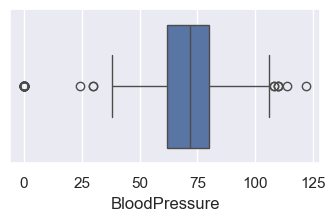

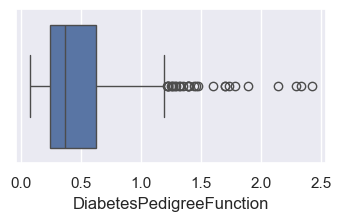

In [11]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

**Calculate Q1, Q3, and IQR:**

Calculates the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR) for each numerical feature. The IQR is used to identify outliers.

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

**Identify and Remove Outliers:**

Creates a new dataframe `df_out` by removing rows that contain outliers. Outliers are defined as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR. `df.shape` and `df_out.shape` show the original and new dimensions of the dataframes.

In [13]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (639, 9))

**Generate Pair Plot (After Outlier Removal):**

Creates a pair plot for the `df_out` dataframe, showing the relationships between all pairs of numerical variables and histograms for individual variables. The `hue="Outcome"` parameter colors the points based on the target variable.

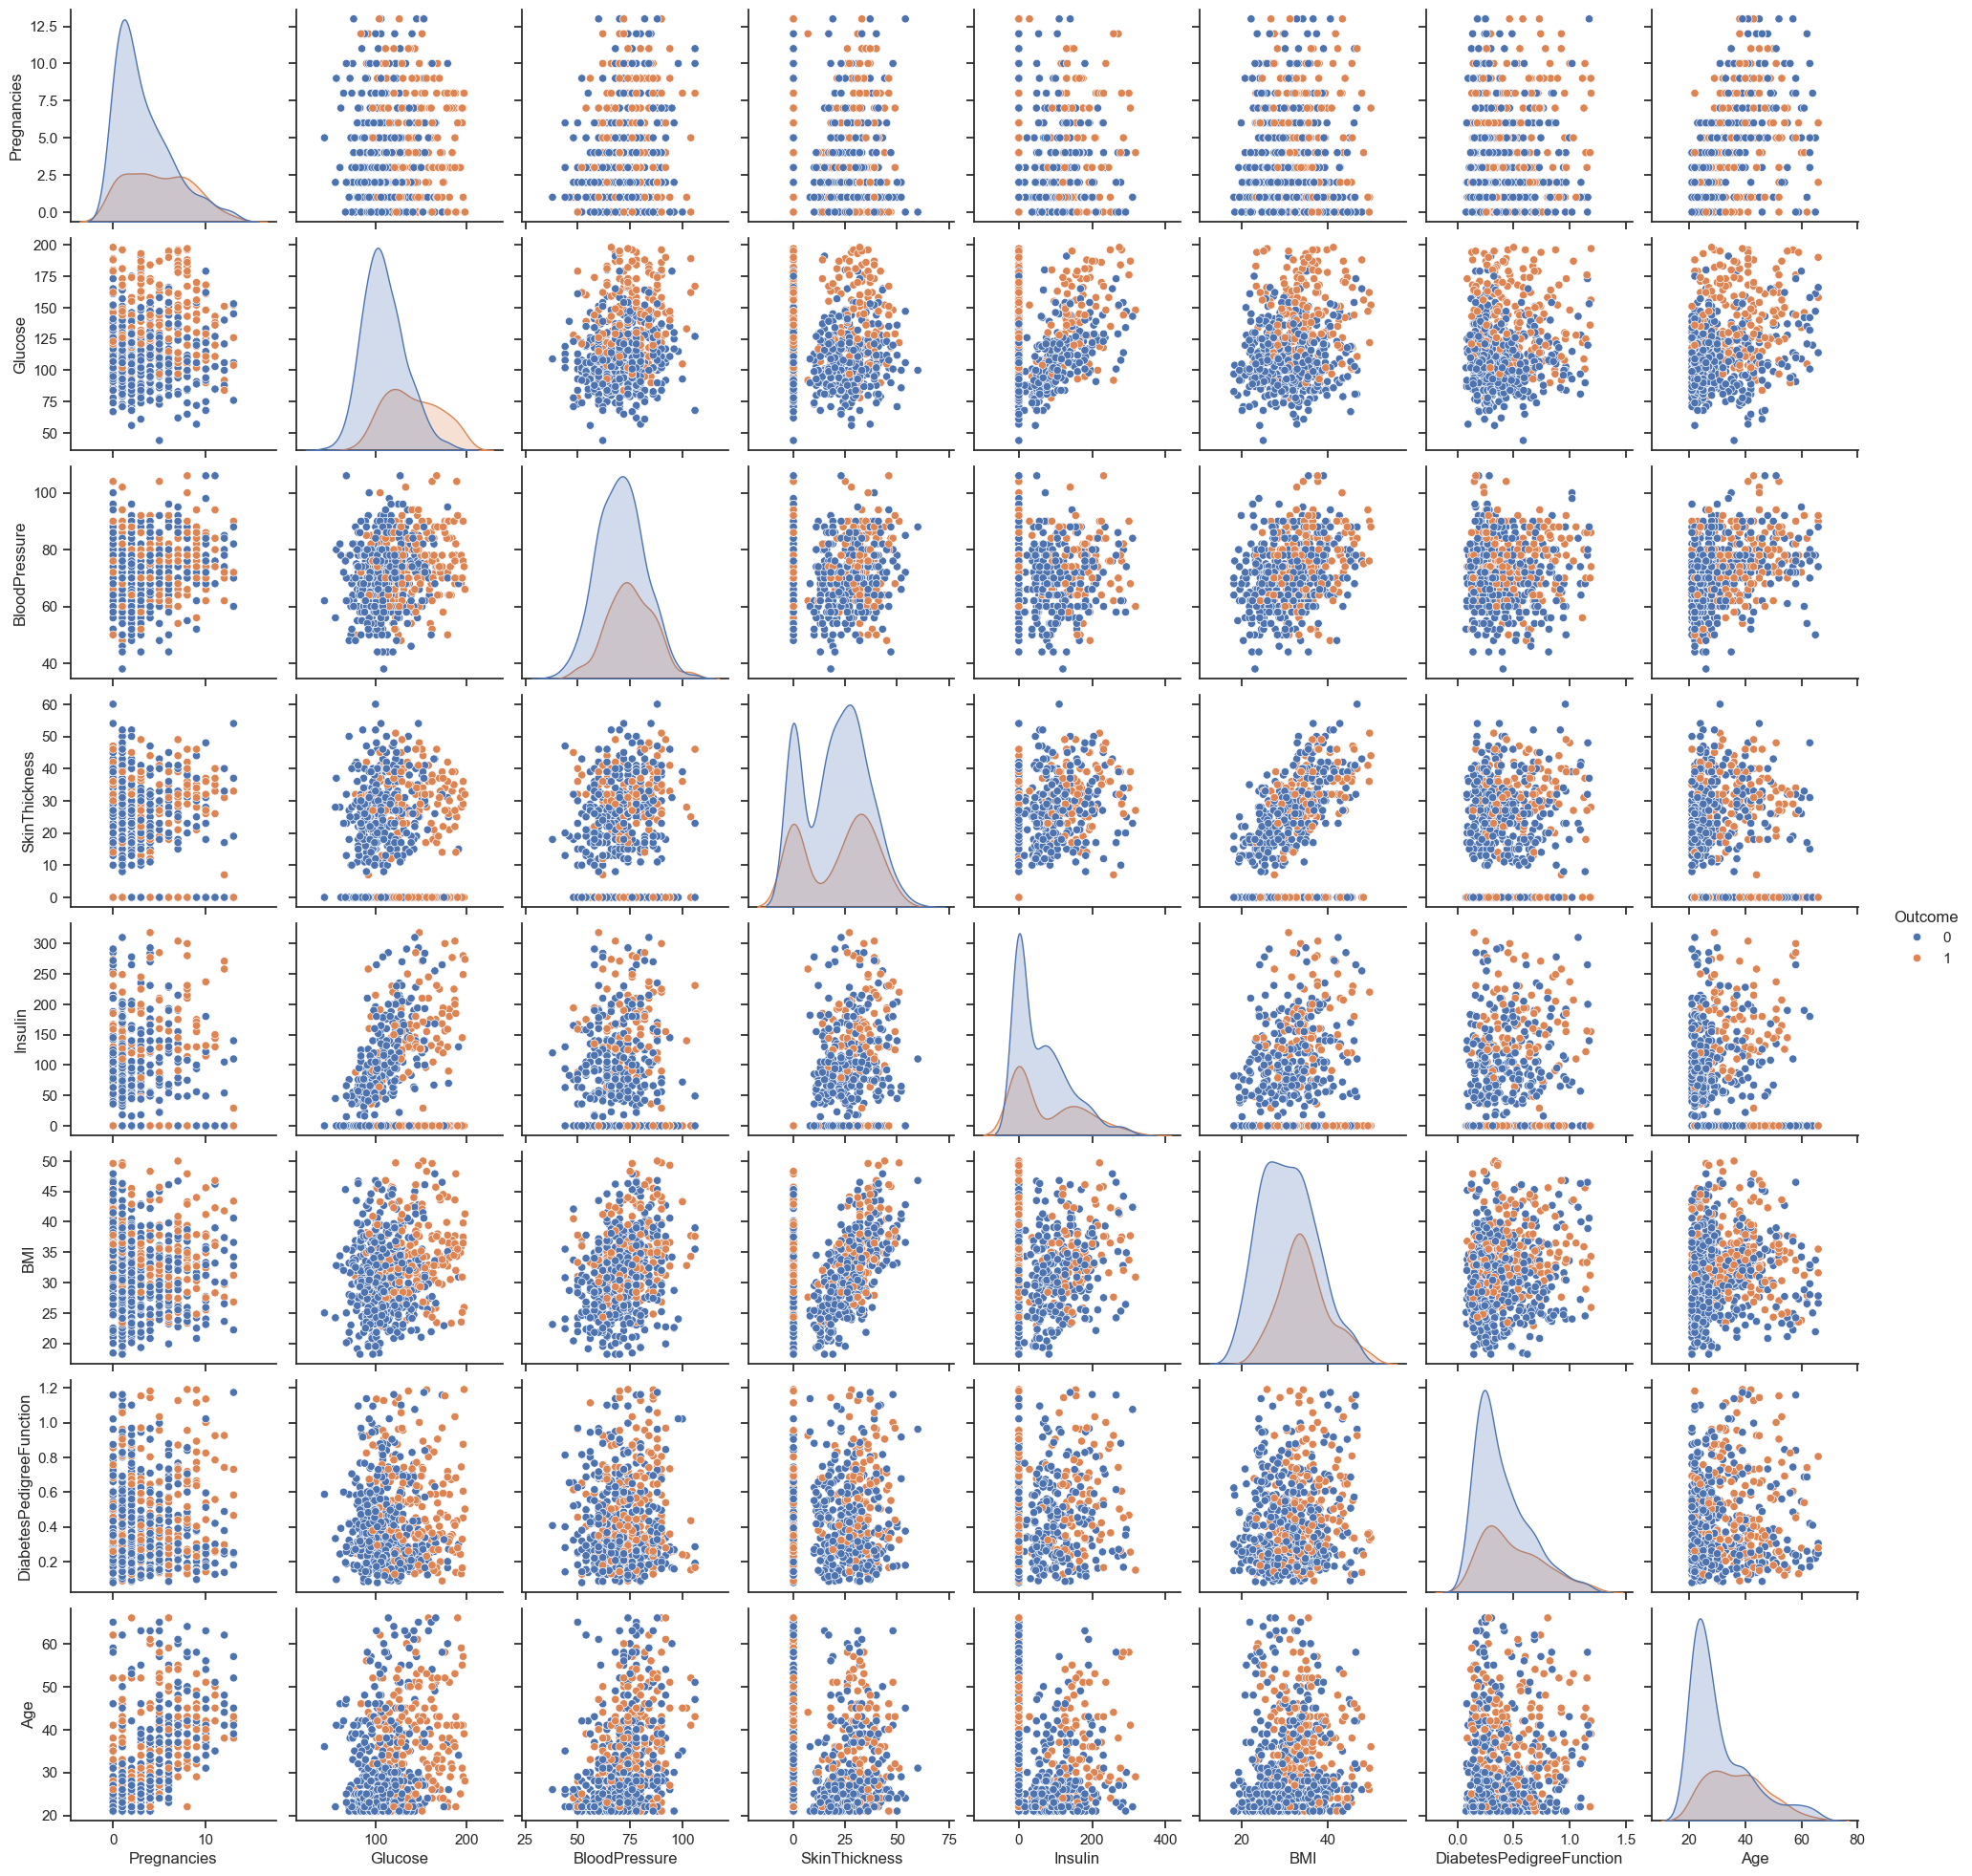

In [14]:
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

**Prepare Data for Linear Regression:**

* Creates the feature matrix `X` by dropping the `DiabetesPedigreeFunction` column from the original dataframe `df`.
* Creates the target vector `y` containing the `DiabetesPedigreeFunction` values.

In [15]:
X = df.drop(columns=['DiabetesPedigreeFunction']) 
y = df['DiabetesPedigreeFunction']

**Split Data into Training and Testing Sets:**

* Splits the data into training and testing sets using `train_test_split`.
* `test_size=0.2` indicates that 20% of the data will be used for testing.
* `random_state=42` ensures reproducibility of the split.

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Linear Regression Model:**

* Creates a `LinearRegression` model.
* Trains the model using the training data (`train_X`, `train_y`).
* Predicts the `DiabetesPedigreeFunction` values for the test set (`test_X`).

**Evaluate Model Performance:**

* Calculates the Mean Squared Error (MSE) and R-squared (R2) score to evaluate the model's performance.
* Prints the calculated MSE and R2 scores.

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.08359869294623203
R² Score: 0.1196080299256399


**Visualize Actual vs. Predicted Values:**

* Creates a scatter plot showing the actual `DiabetesPedigreeFunction` values (`test_y`) vs. the predicted values (`y_pred`).
* Adds a dashed red line representing perfect predictions (actual = predicted).
* Sets labels and title for the plot.

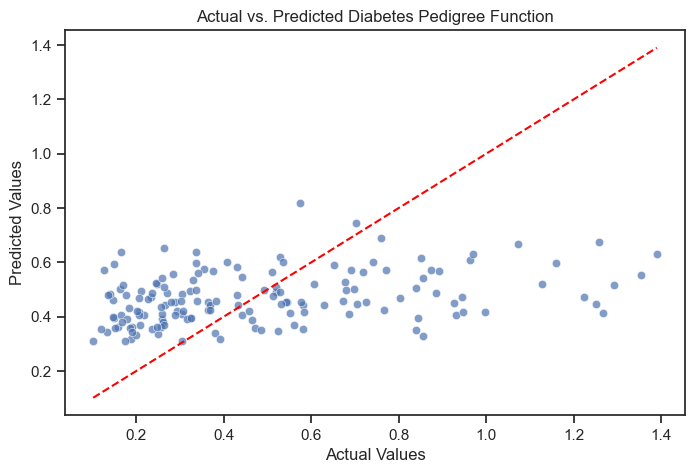

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=test_y, y=y_pred, alpha=0.7)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='dashed')  # Perfect Prediction Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Diabetes Pedigree Function")
plt.show()

**Calculate Residuals and Plot Distribution:**

* Calculates the residuals (errors) by subtracting the predicted values (`y_pred`) from the actual values (`test_y`).
* Creates a histogram of the residuals using `sns.histplot` with a Kernel Density Estimate (KDE) curve.
* Adds a vertical red dashed line at x=0 to indicate the center of the distribution.
* Sets labels and title for the plot.

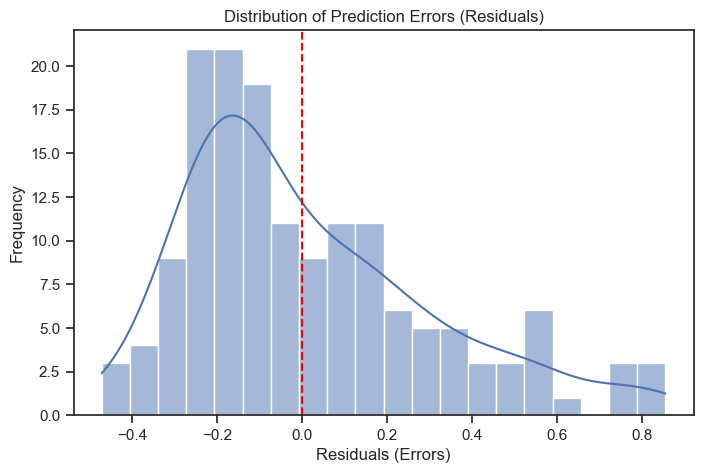

In [19]:
residuals = test_y - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=20)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()

**Prepare Data for Logistic Regression:**
  
* Creates the feature matrix `X` by dropping the `Outcome` column from the original dataframe `df`.
* Creates the target vector `y` containing the `Outcome` values.

In [20]:
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

**Split Data into Training and Testing Sets:**

* Splits the data into training and testing sets using `train_test_split`.
* `test_size=0.2` indicates that 20% of the data will be used for testing.
* Prints the shapes of the training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [22]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

**Define Evaluation Metrics:**

* Defines a function `display_result` to calculate and return the confusion matrix, accuracy, and precision.
* Creates a dictionary `scoring` to define the evaluation metrics to be used in cross-validation.
* Defines a function `display_result` to print the evaluation metrics and confusion matrix.

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

**Train Logistic Regression Model:**

* Creates a `LogisticRegression` model.
* Trains the model using the training data (`train_X`, `train_y`).
* Predicts the `Outcome` values for the test set (`test_X`).
* Calculates the ROC AUC score.
* Performs cross-validation using `cross_validate` and the defined scoring metrics.
* Prints the evaluation results using the `display_result` function.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.765625 ROC 0.6747846747846747
TP:  [ 8  9 11  9 11  6  6  5  9  7]
TN:  [28 31 30 33 31 31 33 31 30 31]
FN:  [ 9  7  5  7  5 10 10 11  8 10]
FP:  [7 4 5 2 4 4 2 4 4 3]


C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amrmu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

**Support Vector Machine (SVM):**

* Creates an SVM classifier with a linear kernel.
* Trains the model on the training data.
* Predicts the target values for the test data.
* Calculates and prints the accuracy and ROC AUC scores.
* Performs 10-fold cross-validation and displays the results.

In [25]:
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.734375 ROC 0.6608256608256607
TP:  [ 8 10 11  8 10  6  6  7  9 11]
TN:  [30 31 30 32 31 34 34 34 30 31]
FN:  [ 9  6  5  8  6 10 10  9  8  6]
FP:  [5 4 5 3 4 1 1 1 4 3]


**K-Nearest Neighbors (KNN):**

* Creates a KNN classifier with 3 neighbors.
* Trains the model on the training data.
* Predicts the target values for the test data.
* Calculates and prints the accuracy and ROC AUC scores.
* Performs 10-fold cross-validation and displays the results.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.734375 ROC 0.6608256608256607
TP:  [ 8 10 11  8  8  9  5  7 11 11]
TN:  [28 25 30 30 28 29 31 31 28 28]
FN:  [ 9  6  5  8  8  7 11  9  6  6]
FP:  [ 7 10  5  5  7  6  4  4  6  6]


**Random Forest:**

* Creates a Random Forest classifier.
* Trains the model on the training data.
* Predicts the target values for the test data.
* Calculates and prints the accuracy and ROC AUC scores.
* Performs 10-fold cross-validation and displays the results.

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.71875 ROC 0.6578556578556579
TP:  [ 6  9 13  7 11  7  5  9 13  9]
TN:  [29 32 30 31 28 33 30 34 30 30]
FN:  [11  7  3  9  5  9 11  7  4  8]
FP:  [6 3 5 4 7 2 5 1 4 4]


**Gaussian Naive Bayes:**

* Creates a Gaussian Naive Bayes classifier.
* Trains the model on the training data.
* Predicts the target values for the test data.
* Calculates and prints the accuracy and ROC AUC scores.
* Performs 10-fold cross-validation and displays the results.

In [28]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.75 ROC 0.7119097119097119
TP:  [ 8 11 11 10 13  6  6  8 13 12]
TN:  [27 30 28 30 26 30 31 30 28 32]
FN:  [ 9  5  5  6  3 10 10  8  4  5]
FP:  [8 5 7 5 9 5 4 5 6 2]


**Gradient Boosting Classifier:**

* Creates a Gradient Boosting classifier with specified hyperparameters.
* Trains the model on the training data.
* Predicts the target values for the test data.
* Calculates and prints the accuracy and ROC AUC scores.
* Performs 10-fold cross-validation and displays the results.

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)

ac=accuracy_score(test_y,y_pred)
acc.append(ac)

rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.7578125 ROC 0.7093852093852093
TP:  [ 5  9 12  7  9  8  8  9 13 10]
TN:  [28 32 31 30 28 28 33 32 30 30]
FN:  [12  7  4  9  7  8  8  7  4  7]
FP:  [7 3 4 5 7 7 2 3 4 4]


**Visualize Accuracy Scores:**

* Creates a bar plot to visualize the accuracy scores of all models.

**Visualize ROC AUC Scores:**

* Creates a bar plot to visualize the ROC AUC scores of all models.

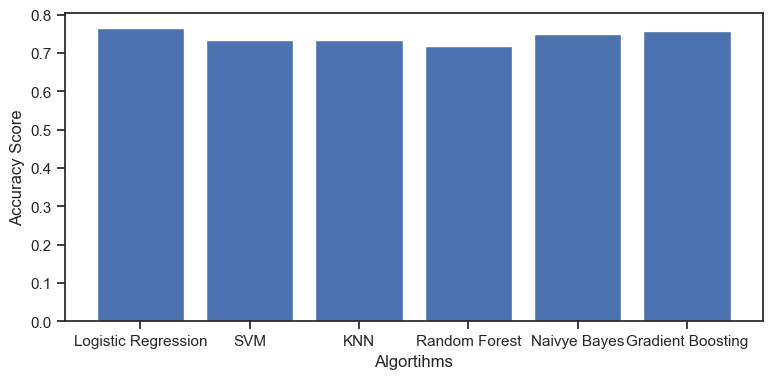

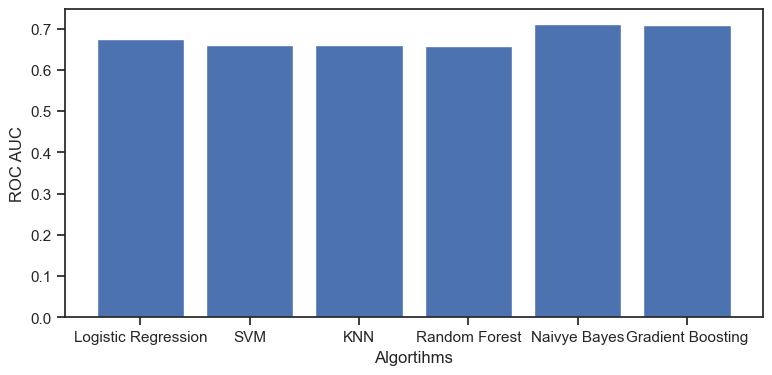

In [30]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

**K-Means Clustering:**

* Imports `KMeans` and `silhouette_score`.
* Prepares the data by dropping the 'Outcome' column and scaling the features.
* Initializes a KMeans model with 2 clusters.
* Fits the model and predicts cluster labels.
* Calculates and prints the silhouette score to evaluate the clustering quality.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

X_clustering = df.drop(columns=['Outcome'])

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [33]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

C:\Users\amrmu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\amrmu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\amrmu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\amrmu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\amrmu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [34]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.16457691963383567


**Deep Learning Model (TensorFlow):**

* Imports necessary modules from TensorFlow Keras.
* Prepares the data, scales it, and splits it into training and testing sets.
* Defines a sequential deep learning model with three dense layers.
* Compiles the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric.
* Trains the model using the training data and validates on a subset of it.
* Predicts the target values for the test data and calculates the accuracy.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\amrmu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6406 - loss: 0.6568 - val_accuracy: 0.7642 - val_loss: 0.5985
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.5970 - val_accuracy: 0.7561 - val_loss: 0.5650
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.5597 - val_accuracy: 0.7236 - val_loss: 0.5413
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.5250 - val_accuracy: 0.7480 - val_loss: 0.5218
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.4888 - val_accuracy: 0.7398 - val_loss: 0.5043
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5057 - val_accuracy: 0.7317 - val_loss: 0.4964
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7609 - loss: 0.4820 - val_accuracy: 0.7398 - val_loss: 0.4878
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.4419 - val_accuracy: 0.7480 - val_loss

In [40]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.7272727272727273
